Saving WhatsApp Image 2023-02-06 at 6.22.34 PM.jpeg to WhatsApp Image 2023-02-06 at 6.22.34 PM.jpeg


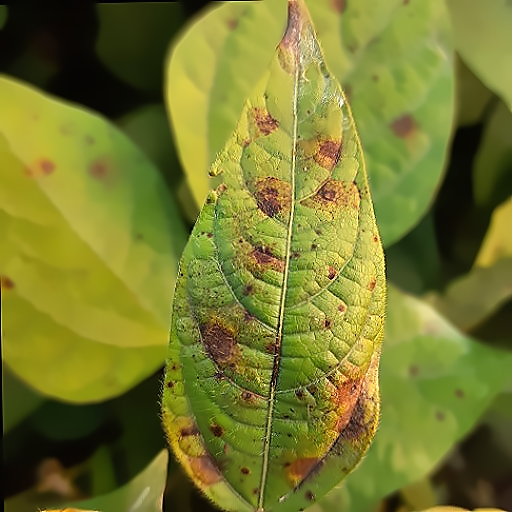

In [ ]:
from google.colab import files
import cv2
import numpy as np
from scipy.signal import convolve2d

def upload_files():
  uploaded = files.upload()
  return uploaded

def increase_contrast(img):
  # Convert the input image to grayscale

  # Increase the contrast of the image
  alpha = 1.1  #contrast
  beta = 2. #brightness
  img_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

  return img_contrast



  return img_multi_scale

def denoise_image(img_multi_scale):
  # Apply the Wiener filter to denoise the image
  img_denoised = cv2.fastNlMeansDenoising(img_multi_scale, None, 10, 7, 21)

  return img_denoised

def display_image(img_denoised):
  # Display the final enhanced image
  cv2.imshow('Enhanced Image', img_denoised)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Get the user to upload the image
uploaded_files = upload_files()
img = cv2.imread(list(uploaded_files.keys())[0])

# Increase the contrast of the image
img_contrast = increase_contrast(img)




# Display the final enhanced image
# Display the final enhanced image
from google.colab.patches import cv2_imshow
#color_image = cv2.cvtColor(img_denoised, cv2.COLOR_GRAY2RGB)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_contrast, ddepth=-1, kernel=kernel)



# Denoise the image using Wiener filter
img_denoised = cv2.fastNlMeansDenoising(np.uint8(image_sharp), None, 10, 7, 21)


cv2_imshow(img_denoised)



if image processing with function calls


Saving WhatsApp Image 2023-02-06 at 6.22.34 PM.jpeg to WhatsApp Image 2023-02-06 at 6.22.34 PM (1).jpeg


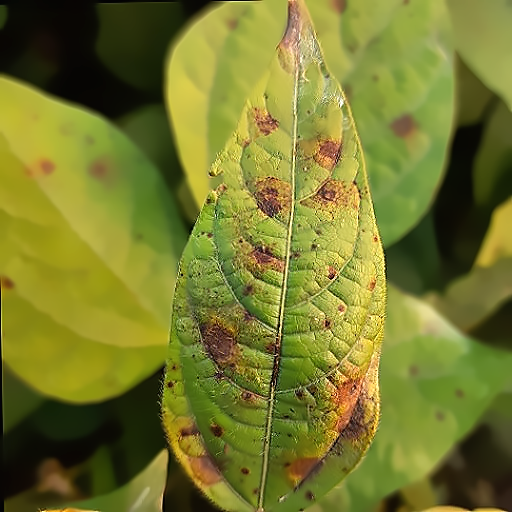

In [ ]:
from google.colab import files
import cv2
import numpy as np
from scipy.signal import convolve2d

def upload_files():
  uploaded = files.upload()
  return uploaded

def increase_contrast(img):
  # Convert the input image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Increase the contrast of the image
  alpha = 1.1  #contrast
  beta = 2. #brightness
  img_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

  return img_contrast



  return img_multi_scale

def denoise_image(img_multi_scale):
  # Apply the Wiener filter to denoise the image
  img_denoised = cv2.fastNlMeansDenoising(img_multi_scale, None, 10, 7, 21)

  return img_denoised

def display_image(img_denoised):
  # Display the final enhanced image
  cv2.imshow('Enhanced Image', img_denoised)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Get the user to upload the image
uploaded_files = upload_files()
img = cv2.imread(list(uploaded_files.keys())[0])





# Display the final enhanced image
# Display the final enhanced image
from google.colab.patches import cv2_imshow
#color_image = cv2.cvtColor(img_denoised, cv2.COLOR_GRAY2RGB)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)



# Denoise the image using Wiener filter
img_denoised = cv2.fastNlMeansDenoising(np.uint8(image_sharp), None, 10, 7, 21)


# Increase the contrast of the image
img_contrast = increase_contrast(img_denoised)


cv2_imshow(img_contrast)



CONTRAST FROM SCRATCH


Saving 9a.jpg to 9a (7).jpg
Enter the lower percent: 1
Enter the upper percent: 99


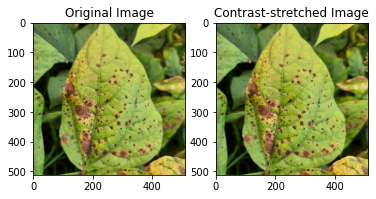

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2


def upload_files():
  uploaded = files.upload()
  return uploaded


def increase_contrast(image, lower_percent, upper_percent):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Find the minimum and maximum intensities in the image
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    
    # Calculate the lower and upper thresholds
    lower_threshold = min_intensity + (max_intensity - min_intensity) * lower_percent / 100.0
    upper_threshold = min_intensity + (max_intensity - min_intensity) * upper_percent / 100.0
    
    # Normalize the intensities of the image between 0 and 255
    contrast_stretched_image = (image - lower_threshold) / (upper_threshold - lower_threshold) * 255
    contrast_stretched_image = np.clip(contrast_stretched_image, 0, 255).astype(np.uint8)

    return contrast_stretched_image

# Load an example image
uploaded_files = upload_files()
image = cv2.imread(list(uploaded_files.keys())[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Input lower and upper percent values from the user
lower_percent = int(input("Enter the lower percent: "))
upper_percent = int(input("Enter the upper percent: "))

# Increase the contrast of the image
contrast_stretched_image = increase_contrast(image, lower_percent, upper_percent)

# Display the original and contrast-stretched images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched_image)
plt.title("Contrast-stretched Image")

plt.show()


WEINER FILTER 

Saving 9a.jpg to 9a (13).jpg
Enter the kernel size: 5
Enter the noise variance: 0.9


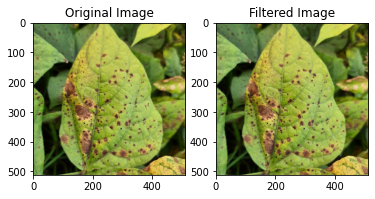

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2


def upload_files():
  uploaded = files.upload()
  return uploaded


def weiner_filter(image, kernel_size, noise_variance):
    # Create a 2D Gaussian kernel with a specified standard deviation
    x = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    y = x[:, np.newaxis]
    x0, y0 = 0, 0
    gaussian_kernel = np.exp(- ((x - x0) ** 2 + (y - y0) ** 2) / (2 * noise_variance))
    gaussian_kernel /= np.sum(gaussian_kernel)
    
    smoothed_image = np.zeros_like(image, dtype=np.float32)
    
    # Convolve the image with the Gaussian kernel
    for i in range(image.shape[0] - kernel_size + 1):
        for j in range(image.shape[1] - kernel_size + 1):
            sub_image = image[i:i+kernel_size, j:j+kernel_size]
            smoothed_image[i+kernel_size//2, j+kernel_size//2] = np.sum(sub_image * gaussian_kernel[..., np.newaxis])
    
    # Calculate the spectral mean and variance of the image
    mean = np.mean(smoothed_image)
    variance = np.var(smoothed_image)
    
    # Apply the Wiener filter
    filtered_image = (image - mean) * (variance / (variance + noise_variance)) + mean
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    
    return filtered_image

# Load an example image
uploaded_files = upload_files()
image = cv2.imread(list(uploaded_files.keys())[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Input the kernel size and noise variance from the user
kernel_size = int(input("Enter the kernel size: "))
noise_variance = float(input("Enter the noise variance: "))

# Remove noise from the image using the Wiener filter
filtered_image = weiner_filter(image, kernel_size, noise_variance)

# Display the original and filtered images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Filtered Image")

plt.show()


SHARPENING THE IMAGE

Saving 9a.jpg to 9a (28).jpg


TypeError: ignored

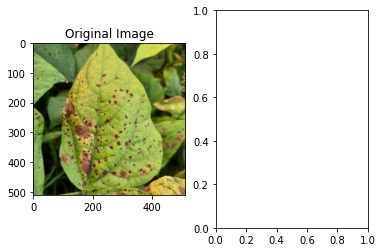

In [35]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def upload_files():
  uploaded = files.upload()
  return uploaded

def sharpen(image):
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    
    # Convolve the image with the sharpening kernel
    sharpened_image = np.zeros(image.shape)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            sharpened_image[i, j] = (
                image[i-1, j-1] * kernel[0, 0] + 
                image[i-1, j] * kernel[0, 1] + 
                image[i-1, j+1] * kernel[0, 2] + 
                image[i, j-1] * kernel[1, 0] + 
                image[i, j] * kernel[1, 1] + 
                image[i, j+1] * kernel[1, 2] + 
                image[i+1, j-1] * kernel[2, 0] + 
                image[i+1, j] * kernel[2, 1] + 
                image[i+1, j+1] * kernel[2, 2]
            )
    
    return sharpened_image

# Load an example image
uploaded_files = upload_files()
image = cv2.imread(list(uploaded_files.keys())[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Sharpen the image
sharpened_image = sharpen(image)

# Display the original and sharpened images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
#sharpened_image = np.invert(sharpened_image)

plt.imshow(sharpened_image)
plt.title("Sharpened Image")

plt.show()


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import cv2

def upload_files():
  uploaded = files.upload()
  return uploaded

def sharpen_image(image, sigma):
    # Blur the image using a Gaussian filter
    blurred_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            weight_sum = 0
            blur_value = 0
            for ii in range(max(0, i - sigma), min(image.shape[0], i + sigma)):
                for jj in range(max(0, j - sigma), min(image.shape[1], j + sigma)):
                    weight = np.exp(-(ii-i)**2/(2*sigma**2) - (jj-j)**2/(2*sigma**2))
                    weight_sum += weight
                    blur_value += weight * image[ii, jj]
            blurred_image[i, j] = blur_value / weight_sum
    
    # Compute the difference between the original and blurred images
    difference = image - blurred_image
    
    # Add the difference back to the original image
    sharpened_image = image + difference

    return sharpened_image

# Load an example image
uploaded_files = upload_files()
image = cv2.imread(list(uploaded_files.keys())[0])

# Input the value of sigma from the user
sigma = int(input("Enter the value of sigma: "))

# Sharpen the image
sharpened_image = sharpen_image(image, sigma)

# Display the original and sharpened images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title("Sharpened Image")

plt.show()


Saving 9a.jpg to 9a (30).jpg
Enter the value of sigma: 50


KeyboardInterrupt: ignored